In [1]:
import pandas as pd
food_order=pd.read_csv("food_orders_new_delhi.csv")
food_order.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,None,146,27,0
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0


In [2]:
food_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Order ID                1000 non-null   int64 
 1   Customer ID             1000 non-null   object
 2   Restaurant ID           1000 non-null   object
 3   Order Date and Time     1000 non-null   object
 4   Delivery Date and Time  1000 non-null   object
 5   Order Value             1000 non-null   int64 
 6   Delivery Fee            1000 non-null   int64 
 7   Payment Method          1000 non-null   object
 8   Discounts and Offers    1000 non-null   object
 9   Commission Fee          1000 non-null   int64 
 10  Payment Processing Fee  1000 non-null   int64 
 11  Refunds/Chargebacks     1000 non-null   int64 
dtypes: int64(6), object(6)
memory usage: 93.9+ KB


In [3]:
from datetime import datetime
food_order["Order Date and Time"]=pd.to_datetime(food_order["Order Date and Time"])
food_order["Delivery Date and Time"]=pd.to_datetime(food_order["Delivery Date and Time"])

In [4]:
food_order.columns

Index(['Order ID', 'Customer ID', 'Restaurant ID', 'Order Date and Time',
       'Delivery Date and Time', 'Order Value', 'Delivery Fee',
       'Payment Method', 'Discounts and Offers', 'Commission Fee',
       'Payment Processing Fee', 'Refunds/Chargebacks'],
      dtype='object')

In [5]:
def extract_discount(discount_str):
    if 'off' in discount_str:
        return float(discount_str.split(' ')[0])
    elif '%' in discount_str:
        return float(discount_str.split('%')[0])
    else:
        return 0.0
food_order["Discount Percent"]=food_order["Discounts and Offers"].apply(lambda x:extract_discount(x))

In [6]:
food_order["Discount Percent"].head()

0     5.0
1    10.0
2    15.0
3     0.0
4    50.0
Name: Discount Percent, dtype: float64

In [11]:
food_order['Discount Amount'] = food_order.apply(lambda x: (x['Order Value'] * x['Discount Percent'] / 100)
                                                   if x['Discount Percent'] > 1
                                                   else x['Discount Percent'], axis=1)

In [13]:
food_order["Discount Amount"]

0       95.70
1       98.60
2      140.55
3        0.00
4      996.00
        ...  
995     41.25
996      0.00
997      0.00
998    212.10
999    248.55
Name: Discount Amount, Length: 1000, dtype: float64

In [14]:
food_order['Discount Amount'] = food_order.apply(lambda x: (x['Order Value'] * x['Discount Percent'] / 100)
                                                   if x['Discount Percent'] > 1
                                                   else x['Discount Percent'], axis=1)


In [15]:
food_order["Discount Amount"]

0       95.70
1       98.60
2      140.55
3        0.00
4      996.00
        ...  
995     41.25
996      0.00
997      0.00
998    212.10
999    248.55
Name: Discount Amount, Length: 1000, dtype: float64

In [17]:
print(food_order[['Order Value', 'Discounts and Offers', 'Discount Percent', 'Discount Amount']].head(), food_order.dtypes)

   Order Value Discounts and Offers  Discount Percent  Discount Amount
0         1914            5% on App               5.0            95.70
1          986                  10%              10.0            98.60
2          937         15% New User              15.0           140.55
3         1463                 None               0.0             0.00
4         1992         50 off Promo              50.0           996.00 Order ID                           int64
Customer ID                       object
Restaurant ID                     object
Order Date and Time       datetime64[ns]
Delivery Date and Time    datetime64[ns]
Order Value                        int64
Delivery Fee                       int64
Payment Method                    object
Discounts and Offers              object
Commission Fee                     int64
Payment Processing Fee             int64
Refunds/Chargebacks                int64
Discount Percent                 float64
Discount Amount                  float64


In [25]:
food_order['Total Costs'] = food_order['Delivery Fee'] + food_order['Payment Processing Fee'] + food_order['Discount Amount']
food_order['Revenue'] = food_order['Commission Fee']
food_order['Profit'] = food_order['Revenue'] - food_order['Total Costs']

total_orders = food_order.shape[0]
total_revenue = food_order['Revenue'].sum()
total_costs = food_order['Total Costs'].sum()
total_profit = food_order['Profit'].sum()

overall_metrics = {
    "Total Orders": total_orders,
    "Total Revenue": total_revenue,
    "Total Costs": total_costs,
    "Total Profit": total_profit
}

print(overall_metrics)

{'Total Orders': 1000, 'Total Revenue': 126990, 'Total Costs': 232709.85, 'Total Profit': -105719.85}


In [26]:
import matplotlib.pyplot as plt

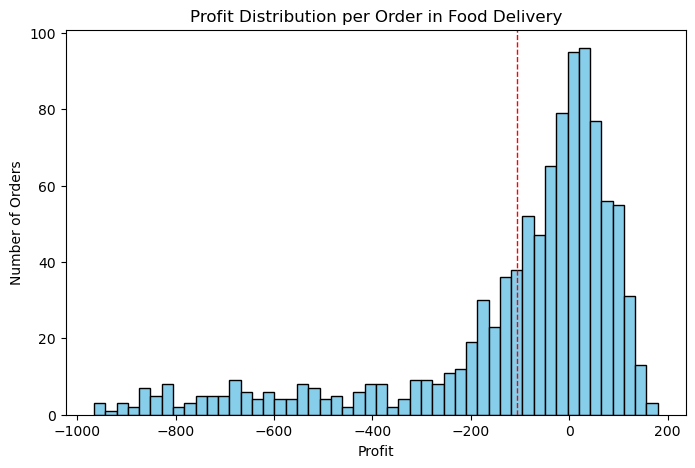

In [31]:
plt.figure(figsize=(8, 5))
plt.hist(food_order['Profit'], bins=50, color='skyblue', edgecolor='black')
plt.title('Profit Distribution per Order in Food Delivery')
plt.xlabel('Profit')
plt.ylabel('Number of Orders')
plt.axvline(food_order['Profit'].mean(), color='red', linestyle='dashed', linewidth=1)
plt.show()

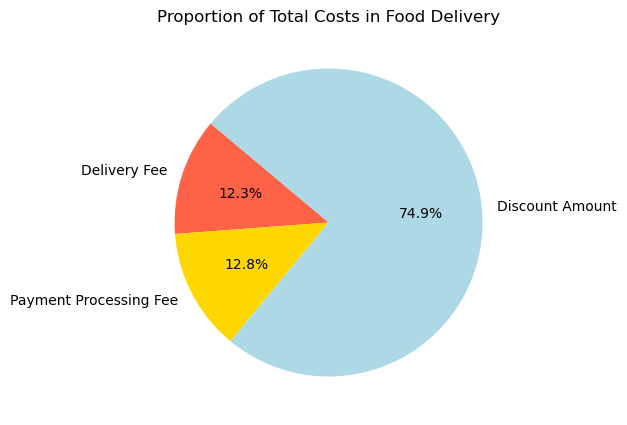

In [34]:
costs_breakdown = food_order[['Delivery Fee', 'Payment Processing Fee', 'Discount Amount']].sum()
plt.figure(figsize=(5, 5))
plt.pie(costs_breakdown, labels=costs_breakdown.index, autopct='%1.1f%%', startangle=140, colors=['tomato', 'gold', 'lightblue'])
plt.title('Proportion of Total Costs in Food Delivery')
plt.show()

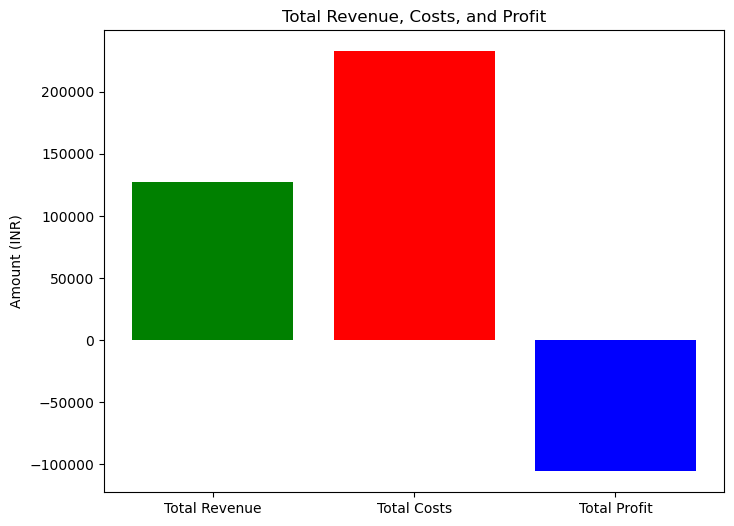

In [35]:
totals = ['Total Revenue', 'Total Costs', 'Total Profit']
values = [total_revenue, total_costs, total_profit]

plt.figure(figsize=(8, 6))
plt.bar(totals, values, color=['green', 'red', 'blue'])
plt.title('Total Revenue, Costs, and Profit')
plt.ylabel('Amount (INR)')
plt.show()

In [39]:
profitable_orders = food_order[food_order['Profit'] > 0]
profitable_orders['Commission Percentage'] = (profitable_orders['Commission Fee'] / profitable_orders['Order Value']) * 100
profitable_orders['Effective Discount Percentage'] = (profitable_orders['Discount Amount'] / profitable_orders['Order Value']) * 100
new_avg_commission_percentage = profitable_orders['Commission Percentage'].mean()
new_avg_discount_percentage = profitable_orders['Effective Discount Percentage'].mean()
print("%.2f" % new_avg_commission_percentage, "%.2f" % new_avg_discount_percentage)

30.51 5.87


C:\Users\sigma\AppData\Local\Temp\ipykernel_36812\3643038033.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profitable_orders['Commission Percentage'] = (profitable_orders['Commission Fee'] / profitable_orders['Order Value']) * 100
C:\Users\sigma\AppData\Local\Temp\ipykernel_36812\3643038033.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profitable_orders['Effective Discount Percentage'] = (profitable_orders['Discount Amount'] / profitable_orders['Order Value']) * 100


## Based on this analysis, a strategy that aims for a commission rate closer to 30% and a discount rate around 6% could potentially improve profitability across the board.

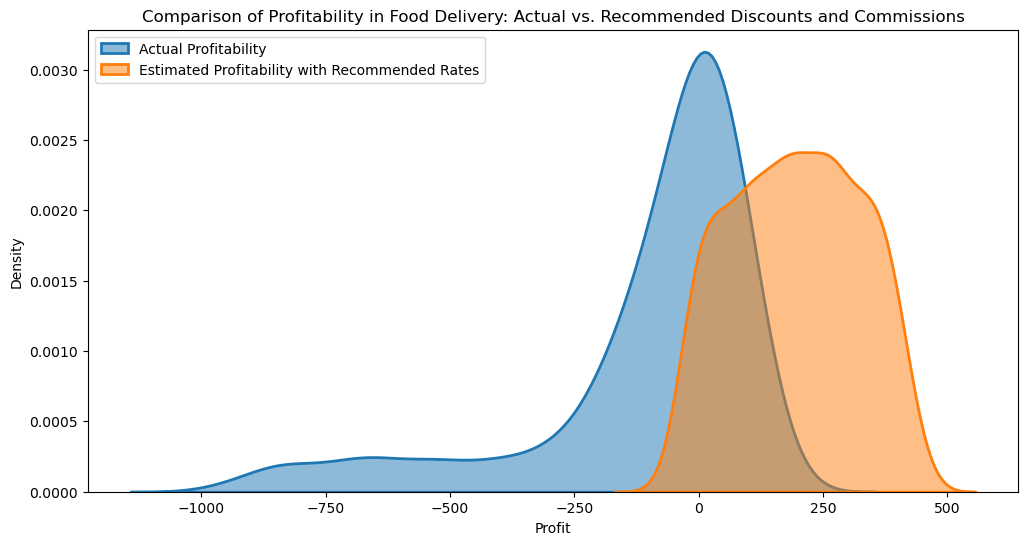

In [44]:
recommended_commission_percentage = 30.0 
recommended_discount_percentage = 6.0    

food_order['Simulated Commission Fee'] = food_order['Order Value'] * (recommended_commission_percentage / 100)
food_order['Simulated Discount Amount'] = food_order['Order Value'] * (recommended_discount_percentage / 100)

food_order['Simulated Total Costs'] = (food_order['Delivery Fee'] +
                                        food_order['Payment Processing Fee'] +
                                        food_order['Simulated Discount Amount'])

food_order['Simulated Profit'] = (food_order['Simulated Commission Fee'] -
                                   food_order['Simulated Total Costs'])

import seaborn as sns

plt.figure(figsize=(12, 6))

sns.kdeplot(food_order['Profit'], label='Actual Profitability', fill=True, alpha=0.5, linewidth=2)

sns.kdeplot(food_order['Simulated Profit'], label='Estimated Profitability with Recommended Rates', fill=True, alpha=0.5, linewidth=2)

plt.title('Comparison of Profitability in Food Delivery: Actual vs. Recommended Discounts and Commissions')
plt.xlabel('Profit')
plt.ylabel('Density')
plt.legend(loc='upper left')
plt.show()

## The visualization compares the distribution of profitability per order using actual discounts and commissions versus the simulated scenario with recommended discounts (6%) and commissions (30%).